In [1]:
from math import factorial
from math import exp
import numpy as np
import matplotlib.pyplot as plt

def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))
def arrangements(n, k):
    return int(factorial(n) / factorial(n - k))
def permutations(n):
    return int(factorial(n))

### Урок 2

#### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

$$P_n(X=k) = C_n^k p^k q^{n-k}$$

In [2]:
n=5 #число вопросов
p = 1/4 # вероятность угадывания правильного ответа  по конкретному вопросу 

In [3]:
q = 1-p 
q

0.75

In [4]:
def Pn_k(n, k, p):
    return combinations(n,k)*p**k*(1-p)**(n-k)

In [5]:
res= []
for i in range(0, n+1):
    res.append(Pn_k(n,i, p))

1.0


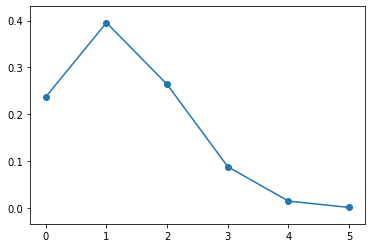

In [6]:
i=np.arange(6)
print(sum(res))
plt.scatter(i, res)
plt.plot(i, res)

In [7]:
M = n*p  # Математическое ожидание для биномиально распределенной дискретной величины
M

1.25

In [8]:
D = n*p*q  # Дисперсия для биномиально распределенной дискретной величины
D

0.9375

###  Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

$$P_m \approx \frac{\lambda^m}{m!}e^{-\lambda}$$

0.95 это сумма вероятностей от 0 писем до N. Иначе говоря интеграл распределения Пуассона от 0 до N. В свою очередь p спама = колво спама/ колво всего. Тогда лямбда  будет равно кол-ву среднего спама в день. 

In [9]:
def aSTb(a,b):
    aa = float(a)
    b=int(b)
    a=1
    for i in range(0,b):
        a = float(a*aa)
    return a

In [10]:
d = aSTb(10, 2)
d

100.0

In [11]:
m=np.arange(25)
Pm = np.zeros(25, dtype=np.float64)
Sm = np.zeros(25, dtype=np.float64)
lambda_ = 10
def pyass(lambda_, m):
    r = np.zeros(25, dtype=np.float64)
    s = np.zeros(25, dtype=np.float64)
    for i in m:
        r[i]=aSTb(lambda_, i)/ np.math.factorial(i) *np.exp(-lambda_)
        if i != 0:
            s[i] = s[i-1]+r[i]
        else:
            s[i] = r[0]
        print(i, aSTb(lambda_, i),np.math.factorial(i),s[i])
    return r, s

In [12]:
Pm, Sm = pyass(lambda_, m)
np.math.factorial(10)

0 1 1 4.5399929762484854e-05
1 10.0 1 0.0004993992273873334
2 100.0 2 0.0027693957155115762
3 1000.0 6 0.010336050675925718
4 10000.0 24 0.029252688076961075
5 100000.0 120 0.06708596287903179
6 1000000.0 720 0.13014142088248298
7 10000000.0 5040 0.22022064660169896
8 100000000.0 40320 0.33281967875071894
9 1000000000.0 362880 0.45792971447185227
10 10000000000.0 3628800 0.5830397501929856
11 100000000000.0 39916800 0.6967761463031068
12 1000000000000.0 479001600 0.7915564763948745
13 10000000000000.0 6227020800 0.8644644226193111
14 100000000000000.0 87178291200 0.9165415270653373
15 1000000000000000.0 1307674368000 0.9512595966960214
16 1e+16 20922789888000 0.972958390215199
17 1e+17 355687428096000 0.9857223864029505
18 1e+18 6402373705728000 0.9928134953961458
19 1e+19 121645100408832000 0.9965456580241433
20 1e+20 2432902008176640000 0.9984117393381421
21 1e+21 51090942171709440000 0.9993003494876653
22 1e+22 1124000727777607680000 0.999704263191994
23 1e+23 2585201673888497664000

3628800

0.9999530506185733


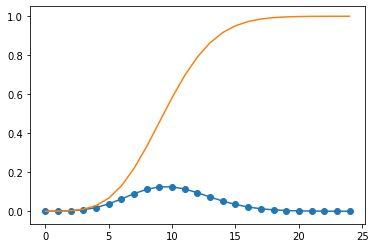

In [13]:
print(sum(Pm))
plt.scatter(m, Pm)
plt.plot(m, Pm)
plt.plot(m, Sm)

In [14]:
from scipy.stats import poisson, binom
poisson.ppf(0.95, lambda_)

15.0

### Задача 3
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

In [15]:
p=0.01 # вероятность попадания

В соответствии с формулой Бернули вероятность случайной величины X (кол-во попаданий) при n выстрелах определяется формулой:

$$P_n(X=k) = C_n^k p^k q^{n-k}$$

В свою очередь,  нам известна  вероятность P(X>=6)= 0.9, очевидно, что обратная вероятнойть равна Q(X<6) =1-P(X>=6). Q = 0.1 и  есть сумма вероятностей  0..5 попаданий. Найдем количество выстрелов N

In [16]:
P = 0
N = 5
while  P<0.9:
    res = 0
    N = N + 1
    for i in range (0,6):
            Qnk= Pn_k(N,i, 0.01)
            res = res + Qnk
    P = 1 - res
    print(P, N)


9.999778782798785e-13 6
6.940115149234316e-12 7
2.752198469124778e-11 8
8.185885302935958e-11 9
2.028940349063646e-10 10
4.42543446332877e-10 11
8.775072890543356e-10 12
1.6157031268448918e-09 13
2.8032755006179855e-09 14
4.632137118321111e-09 15
7.347996544559976e-09 16
1.1258834087257696e-08 17
1.67437835818518e-08 18
2.4262383657713826e-08 19
3.436415985103025e-08 20
4.769850470154324e-08 21
6.502481897374679e-08 22
8.722288513673959e-08 23
1.1530343868582094e-07 24
1.5041890988332085e-07 25
1.9387430538753136e-07 26
2.471382045676762e-07 27
3.1185384186116494e-07 28
3.8985025407889395e-07 29
4.831534615723498e-07 30
5.939976721602847e-07 31
7.248364730649826e-07 32
8.78353999533843e-07 33
1.0574760563875074e-06 34
1.2653811746199395e-06 35
1.5055115861750679e-06 36
1.7815840982482456e-06 37
2.097600851791448e-06 38
2.45785995078851e-06 39
2.866965944980926e-06 40
3.3298401560521995e-06 41
3.851730828952071e-06 42
4.438223103919725e-06 43
5.09524879199752e-06 44
5.8290959450424396e-

0.7728088105794528 762
0.7738576892797117 763
0.7749029287306541 764
0.7759445325661152 765
0.7769825044934657 766
0.7780168482929231 767
0.7790475678168626 768
0.7800746669891321 769
0.7810981498043684 770
0.7821180203273157 771
0.7831342826921466 772
0.7841469411017853 773
0.7851559998272335 774
0.7861614632068978 775
0.7871633356459207 776
0.7881616216155118 777
0.7891563256522849 778
0.790147452357593 779
0.7911350063968704 780
0.7921189924989737 781
0.7930994154555268 782
0.7940762801202684 783
0.7950495914084019 784
0.7960193542959471 785
0.7969855738190953 786
0.7979482550735673 787
0.7989074032139724 788
0.7998630234531714 789
0.8008151210616417 790
0.801763701366845 791
0.8027087697525979 792
0.8036503316584441 793
0.8045883925790314 794
0.8055229580634886 795
0.8064540337148078 796
0.807381625189227 797
0.808305738195617 798
0.8092263784948709 799
0.810143551899295 800
0.8110572642720043 801
0.8119675215263193 802
0.8128743296251664 803
0.8137776945804802 804
0.81467762245260

In [17]:
print("Ответ :",N, P)

Ответ : 926 0.9003627121531355


In [123]:
from scipy.stats import binom
q = 0
res = 0
for i in range(6):
    q = binom.pmf(i, N, 0.01)
    res = res + q
print(1-res)


0.9003627121531483


0.08311195081182757

In [114]:
m=np.arange(1500)
Pm = np.zeros(1500, dtype=np.float64)
Sm = np.zeros(1500, dtype=np.float64)

In [125]:
for i in range(6,1500):
    Pm[i]=binom.pmf(6, i, 0.01)
    r = 0
    for j in range(6):
        q=binom.pmf(j, i, 0.01)
        r = r + q
    Sm[i] = 1 -r
        #Pn_k(i,6, 0.01) 
    

99.25844402849954


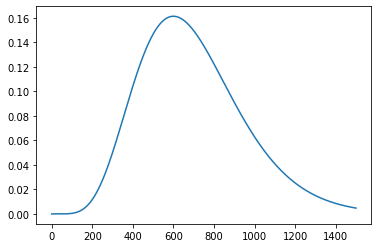

In [126]:
print(sum(Pm))
plt.plot(m, Pm)

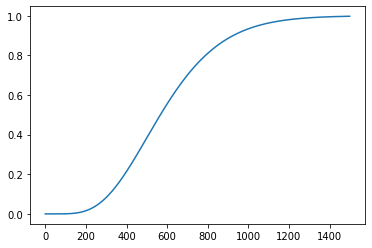

In [127]:
plt.plot(m, Sm)